### Notebook 1: Initial Exploration of Avocado Data

This notebook contains the first step of this Price Elasticity Project: reading in the dataset I will need, doing any cleaning and feature analysis, and exploring any initial correlations or relationships.

Import the needed libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read in the avocado dataset

In [3]:
avodata = pd.read_csv('data/avocado.csv', index_col = 0 )
avodata.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [4]:
avodata.tail(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
3,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


My first observation is that this is weekly price data. That is good to know. From the dataset description on Kaggle, the column descriptions are:
- Date: date of observation
- AveragePrice: the average price of a single avocado
- Total Volume: the total number of avocados sold
- 4046: the total number of avocados with PLU 4046 sold
- 4225: the total number of avocados with PLU 4225 sold
- 4770: the total number of avocados with PLU 4770 sold
- Total Bags: Number of bags the avocados were sold in
- Small Bags: Number of small bags of avocados delivered
- Large Bags: Number of large bags of avocados delivered
- XL Bags: Number of extra large bags of avocados delivered
- Type: type of avocado, either organic or conventional
- year: the year of the observation
- region: the region where the avocados were sold

In [5]:
# How big is this dataset?
avodata.shape

(18249, 13)

In [6]:
# Let's take a look at the different regions available to us:
avodata['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [7]:
# Which regions bought the most avocados?
avodata.groupby('region').sum().sort_values('Total Volume', ascending= False)[:10]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
region,,,,,,,,,,
TotalUS,445.83,5.864740e+09,2.054936e+09,2.015012e+09,1.561752e+08,1.638601e+09,1.243561e+09,3.735843e+08,21455230.54,681458
West,430.01,1.086779e+09,3.985905e+08,3.007589e+08,2.035607e+07,3.670736e+08,2.227093e+08,1.435317e+08,832634.65,681458
California,471.62,1.028982e+09,3.989670e+08,3.514914e+08,3.184105e+07,2.466822e+08,2.290977e+08,1.231194e+07,5272577.91,681458
SouthCentral,372.22,1.011280e+09,5.350414e+08,2.204500e+08,2.239579e+07,2.333924e+08,1.848155e+08,4.593684e+07,2640111.14,681458
Northeast,541.45,7.132809e+08,3.499121e+07,4.744847e+08,6.816645e+06,1.969884e+08,1.736230e+08,2.205605e+07,1309367.56,681458
Southeast,472.53,6.152384e+08,3.396871e+08,9.086044e+07,3.163231e+06,1.815276e+08,1.069033e+08,7.210761e+07,2516762.93,681458
GreatLakes,452.43,5.896425e+08,9.371701e+07,2.672577e+08,5.007597e+07,1.785756e+08,1.232875e+08,4.889564e+07,6392523.96,681458
Midsouth,474.81,5.083494e+08,1.104306e+08,2.223731e+08,1.903196e+07,1.565136e+08,1.343644e+08,2.077087e+07,1378317.13,681458
LosAngeles,411.01,5.078965e+08,2.238794e+08,1.021340e+08,1.361869e+07,1.682645e+08,1.557261e+08,8.463145e+06,4075279.95,681458


In [8]:
# I'm going to rename the columns so there are no spaces and everything is lowercase:
avodata.columns = avodata.columns.str.lower()

avodata.rename(columns={
    'total volume': 'total_volume',
    'total bags'  : 'total_bags',
    'small bags'  : 'small_bags',
    'xlarge bags' : 'xl_bags',
}, inplace=True)
avodata.head()

,date,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large bags,xl_bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
# Let me see if there are any missing values
avodata.isna().sum()

date            0
averageprice    0
total_volume    0
4046            0
4225            0
4770            0
total_bags      0
small_bags      0
large bags      0
xl_bags         0
type            0
year            0
region          0
dtype: int64

In [ ]:
# Looks like a clean dataset

Since this is my first time modeling for price elasticity, I'm going to select one year of data, say 2015, and then model each region separately to 
understand if there are any differences in their behavior. I'll start with TotalUS consumption for now, and then it could be fun to see if the region West displays a different response to price changes. And I just want to model the conventional avocados for now, but it would be interesting to see if the modelling results for organic avocados are significantly different or not.

In [10]:
# Create the totalus_2015 dataset
totalus_2015 = avodata[(avodata['region'] == 'TotalUS') & (avodata['year'] == 2015) & (avodata['type'] == 'conventional')]
totalus_2015['date'] = pd.to_datetime(totalus_2015['date'])
totalus_2015.set_index('date', inplace = True)
totalus_2015.sort_index(inplace = True)
totalus_2015.head()

<ipython-input-10-144b36fefeee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalus_2015['date'] = pd.to_datetime(totalus_2015['date'])
<ipython-input-10-144b36fefeee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalus_2015.sort_index(inplace = True)


,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large bags,xl_bags,type,year,region
date,,,,,,,,,,,,
2015-01-04,0.95,31324277.73,12357161.34,13624083.05,844093.32,4498940.02,3585321.58,894945.63,18672.81,conventional,2015,TotalUS
2015-01-11,1.01,29063542.75,11544810.53,12134773.38,866574.66,4517384.18,3783261.16,718333.87,15789.15,conventional,2015,TotalUS
2015-01-18,1.03,29043458.85,11858139.34,11701947.80,831301.90,4652069.81,3873041.26,771093.20,7935.35,conventional,2015,TotalUS
2015-01-25,1.04,28470310.84,12167445.03,10734652.82,768020.05,4800192.94,3978636.90,812924.73,8631.31,conventional,2015,TotalUS
2015-02-01,0.89,44655461.51,18933038.04,18956479.74,1381516.11,5384427.62,4216452.03,1121076.47,46899.12,conventional,2015,TotalUS


Now to calculate the price elasticity for the weekly data.

In [11]:
totalus_2015['pct_chg_quantity'] = np.round(totalus_2015['total_volume'].pct_change(), decimals=3)
totalus_2015['pct_chg_price'] = np.round(totalus_2015['averageprice'].pct_change(), decimals=3)
totalus_2015['price_eod'] = totalus_2015['pct_chg_quantity'] / totalus_2015['pct_chg_price']
totalus_2015.head(3)

<ipython-input-11-c38cafdc2130>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalus_2015['pct_chg_quantity'] = np.round(totalus_2015['total_volume'].pct_change(), decimals=3)
<ipython-input-11-c38cafdc2130>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalus_2015['pct_chg_price'] = np.round(totalus_2015['averageprice'].pct_change(), decimals=3)
<ipython-input-11-c38cafdc2130>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large bags,xl_bags,type,year,region,pct_chg_quantity,pct_chg_price,price_eod
date,,,,,,,,,,,,,,,
2015-01-04,0.95,31324277.73,12357161.34,13624083.05,844093.32,4498940.02,3585321.58,894945.63,18672.81,conventional,2015,TotalUS,NaN,NaN,NaN
2015-01-11,1.01,29063542.75,11544810.53,12134773.38,866574.66,4517384.18,3783261.16,718333.87,15789.15,conventional,2015,TotalUS,-0.072,0.063,-1.142857
2015-01-18,1.03,29043458.85,11858139.34,11701947.80,831301.90,4652069.81,3873041.26,771093.20,7935.35,conventional,2015,TotalUS,-0.001,0.020,-0.050000


In [12]:
totalus_2015.tail()

,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large bags,xl_bags,type,year,region,pct_chg_quantity,pct_chg_price,price_eod
date,,,,,,,,,,,,,,,
2015-11-29,0.99,22617999.38,8094803.56,9003178.41,731008.41,4789009.00,3901953.04,856560.34,30495.62,conventional,2015,TotalUS,-0.099,0.031,-3.193548
2015-12-06,0.89,28800396.57,9405464.36,12160838.62,931830.63,6302262.96,5005077.36,1233956.21,63229.39,conventional,2015,TotalUS,0.273,-0.101,-2.702970
2015-12-13,0.93,28041335.38,9855053.66,10805838.91,1016163.17,6364279.64,4964462.13,1371440.28,28377.23,conventional,2015,TotalUS,-0.026,0.045,-0.577778
2015-12-20,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,conventional,2015,TotalUS,-0.105,0.054,-1.944444
2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,conventional,2015,TotalUS,0.088,-0.031,-2.838710


In [20]:
totalus_2015.describe()

,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large bags,xl_bags,year,pct_chg_quantity,pct_chg_price,price_eod
count,52.000000,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,52.000000,52.0,51.000000,51.000000,51.000000
mean,1.012500,3.122473e+07,1.235184e+07,1.243870e+07,1.024978e+06,5.409210e+06,4.471774e+06,8.978641e+05,39571.984615,2015.0,0.005333,0.001020,NaN
std,0.047481,3.894761e+06,2.642106e+06,1.744021e+06,1.889438e+05,6.000609e+05,5.542073e+05,2.143131e+05,35864.219233,0.0,0.135322,0.045611,NaN
min,0.890000,2.261800e+07,8.094804e+06,9.003178e+06,7.310084e+05,4.417407e+06,3.476493e+06,6.103492e+05,7461.200000,2015.0,-0.280000,-0.144000,-inf
25%,0.980000,2.898269e+07,9.899741e+06,1.139643e+07,8.703249e+05,4.957140e+06,4.069121e+06,7.146359e+05,19513.860000,2015.0,-0.075000,-0.020000,-3.232697
50%,1.020000,3.077318e+07,1.254696e+07,1.224844e+07,1.016397e+06,5.288137e+06,4.353273e+06,8.366597e+05,30561.675000,2015.0,-0.017000,0.000000,-2.098039
75%,1.040000,3.263367e+07,1.386004e+07,1.353782e+07,1.143252e+06,5.819144e+06,4.780950e+06,1.048523e+06,51255.620000,2015.0,0.060000,0.035000,-0.750000
max,1.090000,4.465546e+07,1.893304e+07,1.895648e+07,1.614283e+06,6.743615e+06,5.893642e+06,1.371440e+06,199305.120000,2015.0,0.568000,0.084000,inf


I'd like to look at some initial correlations with price elasticity using Pearson Correlation before I start modeling.

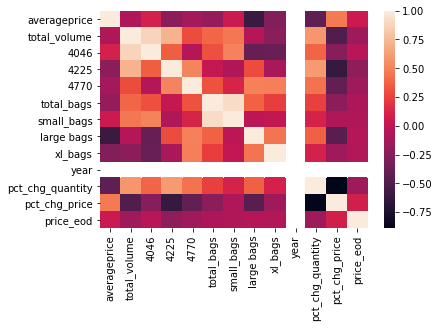

In [13]:
sns.heatmap(totalus_2015.corr())

In [14]:
totalus_2015.corr()

,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large bags,xl_bags,year,pct_chg_quantity,pct_chg_price,price_eod
averageprice,1.000000,-0.068877,0.101755,-0.232033,-0.119672,-0.183023,0.051870,-0.602213,-0.265145,NaN,-0.426002,0.468564,0.051565
total_volume,-0.068877,1.000000,0.885999,0.723617,0.294568,0.393619,0.462106,-0.052929,-0.238781,NaN,0.590172,-0.496804,-0.137728
4046,0.101755,0.885999,1.000000,0.362528,-0.050158,0.309752,0.512130,-0.392934,-0.383264,NaN,0.379974,-0.245272,-0.037786
4225,-0.232033,0.723617,0.362528,1.000000,0.516583,0.031419,-0.073579,0.292763,-0.086773,NaN,0.615668,-0.618753,-0.208055
4770,-0.119672,0.294568,-0.050158,0.516583,1.000000,0.316500,0.115954,0.503839,0.492899,NaN,0.443724,-0.411905,-0.142683
total_bags,-0.183023,0.393619,0.309752,0.031419,0.316500,1.000000,0.921748,0.377039,0.234696,NaN,0.243639,-0.231447,-0.081346
small_bags,0.051870,0.462106,0.512130,-0.073579,0.115954,0.921748,1.000000,-0.007654,0.014997,NaN,0.112059,-0.063444,-0.068011
large bags,-0.602213,-0.052929,-0.392934,0.292763,0.503839,0.377039,-0.007654,1.000000,0.451006,NaN,0.367354,-0.449011,-0.042142
xl_bags,-0.265145,-0.238781,-0.383264,-0.086773,0.492899,0.234696,0.014997,0.451006,1.000000,NaN,0.099936,-0.144680,-0.057044
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Initial interpretations here are that the various factors are not strongly correlated to the price elasticity, but that the % change in price is more correlated than the % change in quantity. The other factors not correlating much make logical sense to me. Many of the other columns, like the PLU numbers and the different size of bags, are just different ways to determine quantity. None of these columns are related to information about the consumers in the Total US region.

It is occurring to me that I should plot the price elasticity of demand over time for observational purposes.

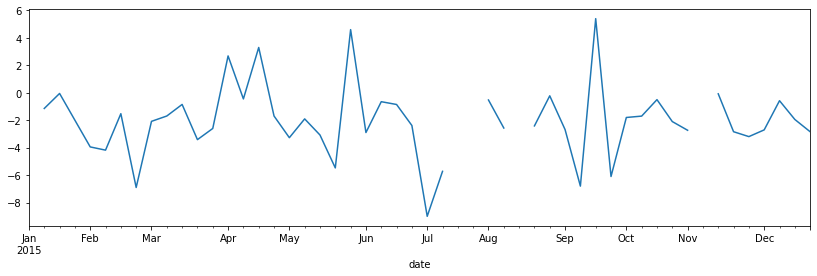

In [73]:
totalus_2015['price_eod'].plot(figsize=(14,4))

I would like to start getting into the modelling now, and I think I would like more than just the year 2015 in my modelling dataset so that I can try to use any seasonality to the data. I still want to start with the Total US data for now, and I'll still stick with the conventionally grown avocados to start with.

In [15]:
# Create the totalus dataset
totalus = avodata[(avodata['region'] == 'TotalUS') & (avodata['type'] == 'conventional')]
totalus['date'] = pd.to_datetime(totalus['date'])
totalus.set_index('date', inplace = True)
totalus.sort_index(inplace = True)
totalus.head()

<ipython-input-15-200e3ecc9b86>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalus['date'] = pd.to_datetime(totalus['date'])
<ipython-input-15-200e3ecc9b86>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalus.sort_index(inplace = True)


,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large bags,xl_bags,type,year,region
date,,,,,,,,,,,,
2015-01-04,0.95,31324277.73,12357161.34,13624083.05,844093.32,4498940.02,3585321.58,894945.63,18672.81,conventional,2015,TotalUS
2015-01-11,1.01,29063542.75,11544810.53,12134773.38,866574.66,4517384.18,3783261.16,718333.87,15789.15,conventional,2015,TotalUS
2015-01-18,1.03,29043458.85,11858139.34,11701947.80,831301.90,4652069.81,3873041.26,771093.20,7935.35,conventional,2015,TotalUS
2015-01-25,1.04,28470310.84,12167445.03,10734652.82,768020.05,4800192.94,3978636.90,812924.73,8631.31,conventional,2015,TotalUS
2015-02-01,0.89,44655461.51,18933038.04,18956479.74,1381516.11,5384427.62,4216452.03,1121076.47,46899.12,conventional,2015,TotalUS


In [16]:
#Calculate the price elasticity
totalus['pct_chg_quantity'] = np.round(totalus['total_volume'].pct_change(), decimals=3)
totalus['pct_chg_price'] = np.round(totalus['averageprice'].pct_change(), decimals=3)
totalus['price_eod'] = totalus['pct_chg_quantity'] / totalus['pct_chg_price']
totalus.head(3)

<ipython-input-16-581e969dd4f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalus['pct_chg_quantity'] = np.round(totalus['total_volume'].pct_change(), decimals=3)
<ipython-input-16-581e969dd4f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalus['pct_chg_price'] = np.round(totalus['averageprice'].pct_change(), decimals=3)
<ipython-input-16-581e969dd4f0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large bags,xl_bags,type,year,region,pct_chg_quantity,pct_chg_price,price_eod
date,,,,,,,,,,,,,,,
2015-01-04,0.95,31324277.73,12357161.34,13624083.05,844093.32,4498940.02,3585321.58,894945.63,18672.81,conventional,2015,TotalUS,NaN,NaN,NaN
2015-01-11,1.01,29063542.75,11544810.53,12134773.38,866574.66,4517384.18,3783261.16,718333.87,15789.15,conventional,2015,TotalUS,-0.072,0.063,-1.142857
2015-01-18,1.03,29043458.85,11858139.34,11701947.80,831301.90,4652069.81,3873041.26,771093.20,7935.35,conventional,2015,TotalUS,-0.001,0.020,-0.050000


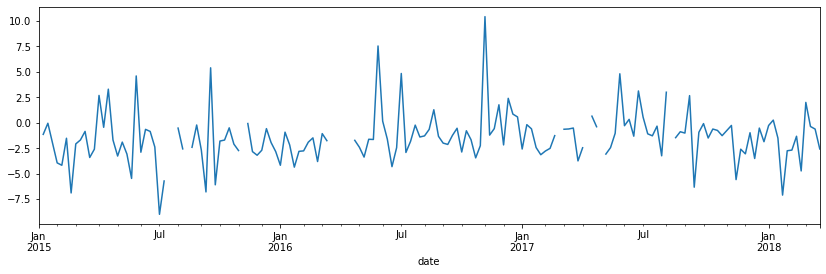

In [18]:
#Take a quick look at the data in a plot to see how the numbers change over multiple years.
totalus['price_eod'].plot(figsize=(14,4))

Price elasticity EDA wouldn't be complete without checking for Perfect Inelasticity (where the elasticity calculation, or coefficient, is 0) or Perfect Elasticity (where the coefficient is +/- infinit). Let's take a look at the data to see if we have either one.

In [21]:
totalus.describe()

,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large bags,xl_bags,year,pct_chg_quantity,pct_chg_price,price_eod
count,169.000000,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02,169.000000,169.000000,168.000000,168.000000,168.000000
mean,1.092012,3.373504e+07,1.201098e+07,1.161486e+07,9.187040e+05,9.190493e+06,7.000174e+06,2.063387e+06,126931.146450,2016.147929,0.010827,0.002500,NaN
std,0.174119,6.118092e+06,2.470219e+06,2.363234e+06,4.305041e+05,3.151089e+06,2.209822e+06,9.805227e+05,106234.014701,0.942709,0.140722,0.062908,NaN
min,0.760000,2.100973e+07,7.020459e+06,6.852046e+06,3.444759e+05,4.417407e+06,3.476493e+06,6.103492e+05,7461.200000,2015.000000,-0.327000,-0.202000,-inf
25%,0.970000,2.976164e+07,1.032046e+07,1.019789e+07,5.838010e+05,5.930474e+06,4.964462e+06,1.183732e+06,49457.450000,2015.000000,-0.066000,-0.026750,-2.736626
50%,1.040000,3.299401e+07,1.209132e+07,1.135428e+07,8.219644e+05,9.583714e+06,7.102422e+06,2.117566e+06,82386.140000,2016.000000,-0.004000,0.006500,-1.516905
75%,1.190000,3.702609e+07,1.326275e+07,1.299833e+07,1.143215e+06,1.125480e+07,8.503871e+06,2.799961e+06,192999.800000,2017.000000,0.059250,0.039000,-0.515000
max,1.650000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,0.568000,0.158000,inf


Looks like we do have cases of Perfect Elasticity here. Investigate the Inf and -Inf values to see if there are any initial trends to be observed.

In [52]:
#Start with the positive infiniti values
infdata = totalus[(totalus['price_eod'] == np.inf)]
infdata

,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large bags,xl_bags,type,year,region,pct_chg_quantity,pct_chg_price,price_eod
date,,,,,,,,,,,,,,,
2015-07-19,1.07,32324647.66,12742760.17,12605457.17,1154897.34,5821532.98,4757798.96,1013834.06,49899.96,conventional,2015,TotalUS,0.021,0.0,inf
2016-04-17,0.90,37467885.19,11954487.56,12896366.58,1896149.50,10720881.55,8128710.21,2467001.94,125169.40,conventional,2016,TotalUS,0.024,0.0,inf
2017-02-26,0.99,37007797.69,13173668.36,11398142.68,896761.77,11539224.88,8945888.88,2405733.76,187602.24,conventional,2017,TotalUS,0.091,0.0,inf
2017-04-09,1.21,34785712.55,12091315.22,10821096.24,647969.03,11225332.06,8946792.83,2098142.94,180396.29,conventional,2017,TotalUS,0.009,0.0,inf
2017-04-30,1.18,38315500.43,13316594.36,11291149.13,667996.83,13039760.11,9463810.58,3378923.98,197025.55,conventional,2017,TotalUS,0.072,0.0,inf
2017-08-13,1.33,32817254.13,10952703.84,11154310.29,624963.41,10085276.59,6687661.77,3118889.17,278725.65,conventional,2017,TotalUS,0.009,0.0,inf


The month of April showed up more than any other month, and most of the values show up in 2017, so perhaps there is a trend there. More investigation to be done before jumping to any premature conclusions. Let's take a look at the negatively infinite data.

In [53]:
#Now the negative infiniti values
neginfdata = totalus[(totalus['price_eod'] == -np.inf)]
neginfdata

,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large bags,xl_bags,type,year,region,pct_chg_quantity,pct_chg_price,price_eod
date,,,,,,,,,,,,,,,
2015-07-26,1.07,30652211.08,12196225.93,12009228.05,1017157.74,5429599.36,4627251.87,779807.55,22539.94,conventional,2015,TotalUS,-0.052,0.0,-inf
2015-08-16,1.05,31936856.18,12680252.48,12998327.25,1143364.58,5114911.87,4342839.06,703542.10,68530.71,conventional,2015,TotalUS,-0.040,0.0,-inf
2015-11-08,0.97,28485715.97,9991330.31,12199657.40,1143214.59,5151513.67,4058500.97,1027701.97,65310.73,conventional,2015,TotalUS,-0.083,0.0,-inf
2016-03-20,0.93,36335483.78,11134390.98,13727453.57,1773088.87,9700550.36,7248857.68,2374053.89,77638.79,conventional,2016,TotalUS,-0.001,0.0,-inf
2016-04-03,0.94,33668450.55,11320969.79,11512621.85,1731910.48,9102948.43,6830380.18,2213379.44,59188.81,conventional,2016,TotalUS,-0.063,0.0,-inf


Only one April showing up here, but again we see July, August, and a winter month. There are no values in 2017 here, but 2015 and 2016 are more prevalent. Let's keep going and see if there are any Perfectly Inelastic coefficients in our data.

In [55]:
zerocoeff = totalus[(totalus['price_eod'] == 0)]
zerocoeff

,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large bags,xl_bags,type,year,region,pct_chg_quantity,pct_chg_price,price_eod
date,,,,,,,,,,,,,,,


It looks like we don't have any Perfect Inelasticity in this dataset, so I will move forward.

For now, I will remove the Perfectly Elastic (infinite) values from the dataset and consider them outliers. I may come back later an further investigate them, but since we have a dataset of over 18,000 datapoints and only 11 data points relating to Perfect Elasticity, I'm going to remove them from the dataset to move forward with the modeling.

In [58]:
total_us_filtered = totalus[(totalus['price_eod'] != np.inf) & (totalus['price_eod'] != -np.inf)]
total_us_filtered.describe()

,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large bags,xl_bags,year,pct_chg_quantity,pct_chg_price,price_eod
count,158.000000,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,158.000000,158.000000,157.000000,157.000000,157.000000
mean,1.094367,3.371787e+07,1.201456e+07,1.158416e+07,9.023006e+05,9.216846e+06,7.018930e+06,2.070452e+06,127464.149873,2016.158228,0.011669,0.002675,-1.432222
std,0.176662,6.279959e+06,2.542134e+06,2.430706e+06,4.249961e+05,3.174059e+06,2.227307e+06,9.858730e+05,107974.749424,0.947825,0.144904,0.065084,2.493482
min,0.760000,2.100973e+07,7.020459e+06,6.852046e+06,3.444759e+05,4.417407e+06,3.476493e+06,6.103492e+05,7461.200000,2015.000000,-0.327000,-0.202000,-9.000000
25%,0.980000,2.963622e+07,1.014627e+07,1.007473e+07,5.768177e+05,6.202973e+06,4.973330e+06,1.186004e+06,48292.950000,2015.000000,-0.068000,-0.031000,-2.686957
50%,1.040000,3.289937e+07,1.202957e+07,1.124993e+07,8.134572e+05,9.574061e+06,7.126051e+06,2.067039e+06,83469.755000,2016.000000,-0.008000,0.009000,-1.523810
75%,1.190000,3.702969e+07,1.329523e+07,1.316720e+07,1.116848e+06,1.127097e+07,8.502483e+06,2.800817e+06,197728.790000,2017.000000,0.060000,0.041000,-0.540984
max,1.650000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,0.568000,0.158000,10.428571


To further prepare for modeling and any visualizations, I would like to make the total_volume column more digestible by removing the need for scientific notation.

In [59]:
total_us_filtered['total_volume_million'] = total_us_filtered['total_volume']/1000000
total_us_filtered.head()

<ipython-input-59-1e4f0283d3a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_us_filtered['total_volume_million'] = total_us_filtered['total_volume']/1000000


,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large bags,xl_bags,type,year,region,pct_chg_quantity,pct_chg_price,price_eod,total_volume_million
date,,,,,,,,,,,,,,,,
2015-01-04,0.95,31324277.73,12357161.34,13624083.05,844093.32,4498940.02,3585321.58,894945.63,18672.81,conventional,2015,TotalUS,NaN,NaN,NaN,31.324278
2015-01-11,1.01,29063542.75,11544810.53,12134773.38,866574.66,4517384.18,3783261.16,718333.87,15789.15,conventional,2015,TotalUS,-0.072,0.063,-1.142857,29.063543
2015-01-18,1.03,29043458.85,11858139.34,11701947.80,831301.90,4652069.81,3873041.26,771093.20,7935.35,conventional,2015,TotalUS,-0.001,0.020,-0.050000,29.043459
2015-01-25,1.04,28470310.84,12167445.03,10734652.82,768020.05,4800192.94,3978636.90,812924.73,8631.31,conventional,2015,TotalUS,-0.020,0.010,-2.000000,28.470311
2015-02-01,0.89,44655461.51,18933038.04,18956479.74,1381516.11,5384427.62,4216452.03,1121076.47,46899.12,conventional,2015,TotalUS,0.568,-0.144,-3.944444,44.655462


In [60]:
#Export this dataset and move to Notebook 2: Price Elasticity Modelling Using Linear regression
total_us_filtered.to_csv('data/totalus_eod.csv')